In [1]:
# required imports

import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# read dataset and preview

df = pd.read_csv('height_weight.txt', delimiter='\t')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [3]:
# Drop unimportant columns and preview

df = df.drop(['Index'], axis=1)
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [4]:
# Total data

len(df)

25000

In [5]:
# data type

df.dtypes

Height(Inches)    float64
Weight(Pounds)    float64
dtype: object

In [6]:
# NA check

df.isna().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [7]:
# Null check

df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [8]:
# statistical summary of data

df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [9]:
# Separate feature and target

X = df.drop(['Weight(Pounds)'], axis=1)
y = df['Weight(Pounds)']

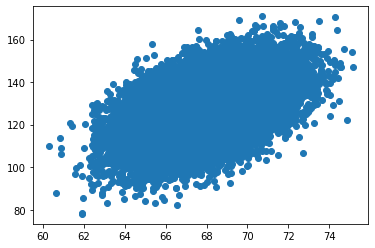

In [10]:
# scatter plot
plt.scatter(X, y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269D6D7B748>]],
      dtype=object)

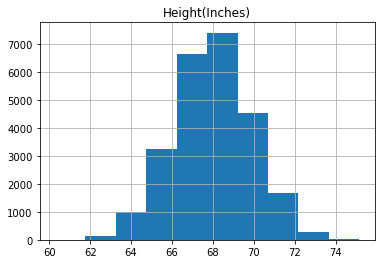

In [11]:
# View distribution using histograms

X.hist()

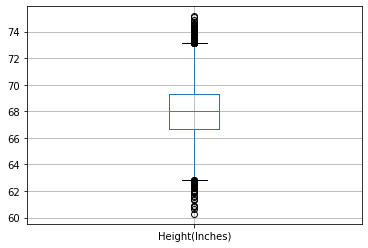

In [12]:
# Boxplot to view outliers

X.boxplot()

In [13]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Linear regression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

print('Train MSE', metrics.mean_squared_error(y_train, y_pred_train))
print('Test MSE', metrics.mean_squared_error(y_test, y_pred))
print('Train R2 score', reg.score(X_train, y_train))
print('Test R2 score', reg.score(X_test, y_test))

Train MSE 101.41133314944125
Test MSE 102.00655311790318
Train R2 score 0.24990303048250348
Test R2 score 0.25961263876058716


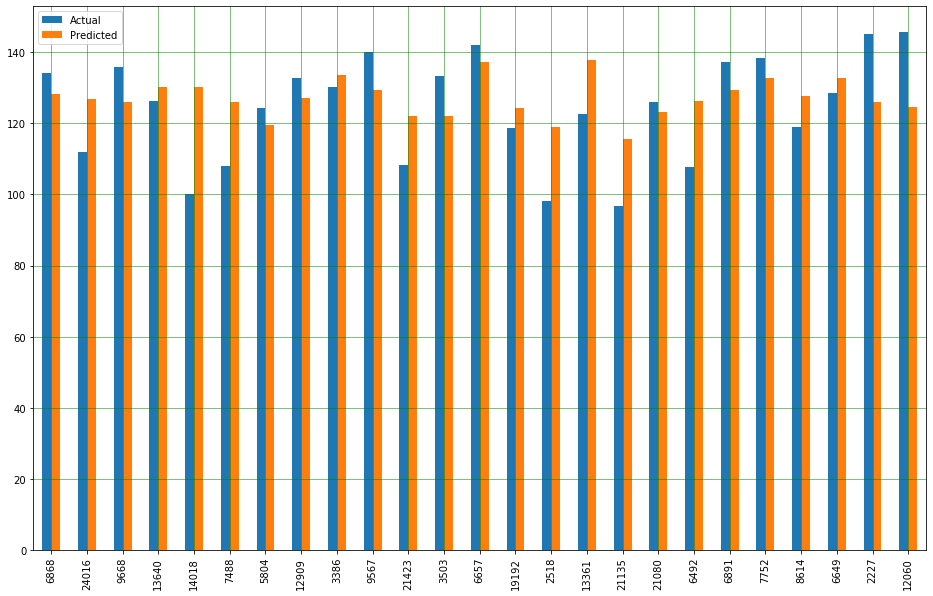

In [15]:
# Visualize comparison between actual and predicted weights

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plot_df = result_df.head(25)
plot_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [16]:
# Random Forest Regressor

reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

print('Train MSE', metrics.mean_squared_error(y_train, y_pred_train))
print('Test MSE', metrics.mean_squared_error(y_test, y_pred))
print('Train R2 score', reg.score(X_train, y_train))
print('Test R2 score', reg.score(X_test, y_test))

Train MSE 21.58198380099393
Test MSE 148.1151377955955
Train R2 score 0.8403671449477396
Test R2 score -0.07505422622545299


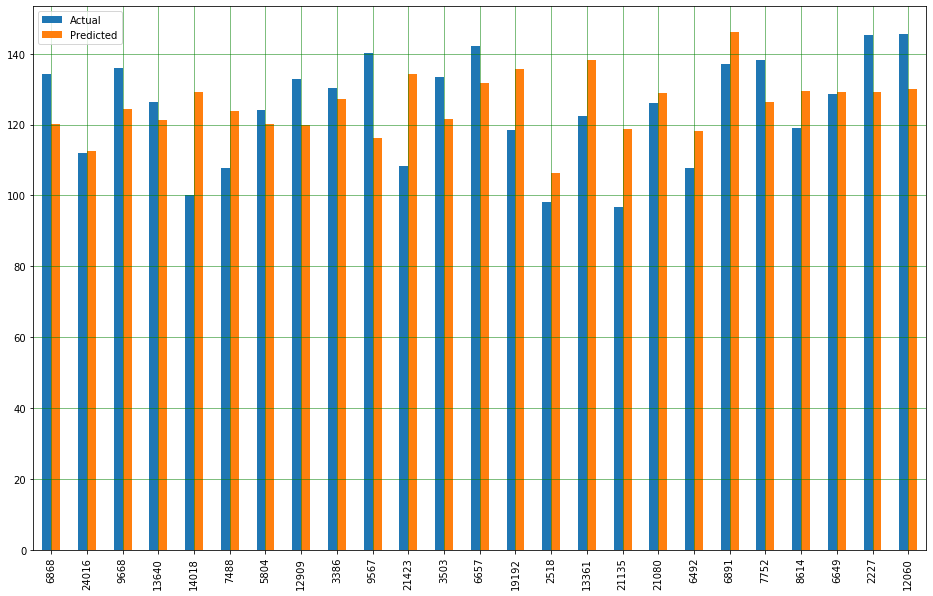

In [17]:
# Visualize comparison between actual and predicted weights

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plot_df = result_df.head(25)
plot_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [18]:
# XGBoost Regressor

reg = XGBRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

print('Train MSE', metrics.mean_squared_error(y_train, y_pred_train))
print('Test MSE', metrics.mean_squared_error(y_test, y_pred))
print('Train R2 score', reg.score(X_train, y_train))
print('Test R2 score', reg.score(X_test, y_test))

[16:58:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train MSE 99.55670437510838
Test MSE 102.06503617354419
Train R2 score 0.26362093931974373
Test R2 score 0.25918815509831483


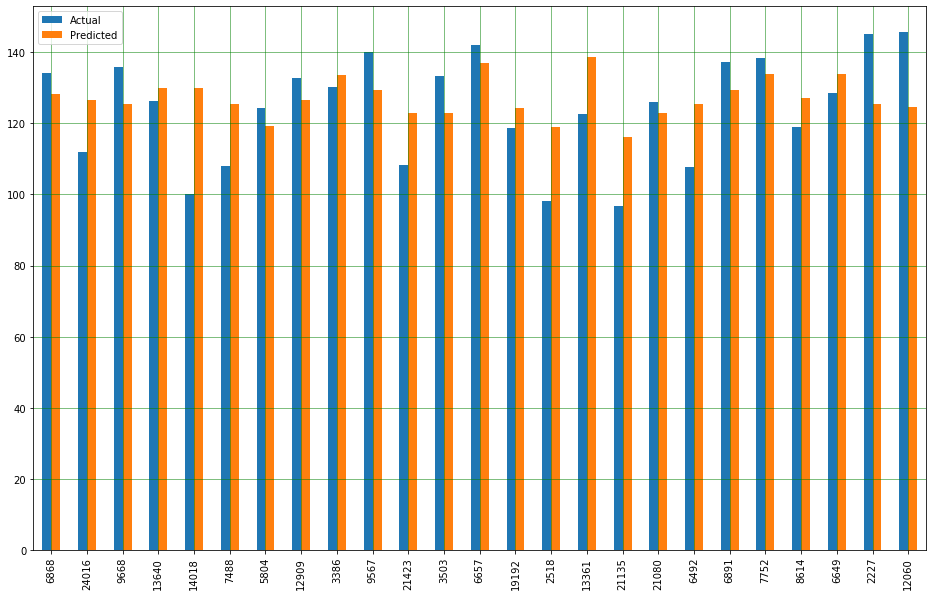

In [19]:
# Visualize comparison between actual and predicted weights

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plot_df = result_df.head(25)
plot_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
# removing outliers

df = df[df['Height(Inches)'] > 63]

df = df[df['Height(Inches)'] < 73]

X = df.drop(['Weight(Pounds)'], axis=1)
y = df['Weight(Pounds)']

#### Data Visualization after removing outlier

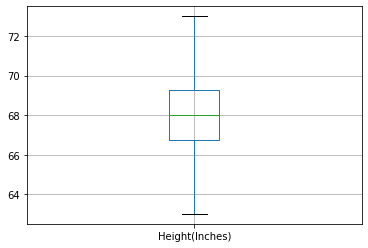

In [21]:
X.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269D8F5A948>]],
      dtype=object)

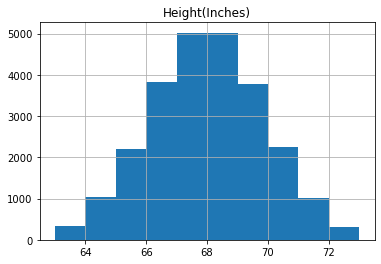

In [22]:
X.hist()

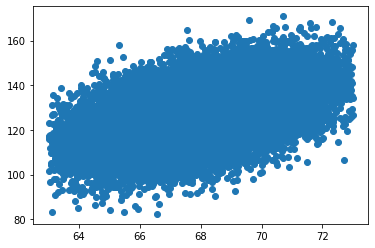

In [23]:
plt.scatter(X,y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Retrain algorithms after removing outliers

In [25]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

print('Train MSE', metrics.mean_squared_error(y_train, y_pred_train))
print('Test MSE', metrics.mean_squared_error(y_test, y_pred))
print('Train R2 score', reg.score(X_train, y_train))
print('Test R2 score', reg.score(X_test, y_test))

Train MSE 101.1163333884713
Test MSE 102.25438197718776
Train R2 score 0.2441620588197291
Test R2 score 0.23178460565333192


In [26]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

print('Train MSE', metrics.mean_squared_error(y_train, y_pred_train))
print('Test MSE', metrics.mean_squared_error(y_test, y_pred))
print('Train R2 score', reg.score(X_train, y_train))
print('Test R2 score', reg.score(X_test, y_test))

Train MSE 21.36577601394404
Test MSE 151.37311144689247
Train R2 score 0.8402922296237108
Test R2 score -0.1372339478771627


In [27]:
reg = XGBRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('Train MSE', metrics.mean_squared_error(y_train, y_pred_train))
print('Test MSE', metrics.mean_squared_error(y_test, y_pred))
print('Train R2 score', reg.score(X_train, y_train))
print('Test R2 score', reg.score(X_test, y_test))

[16:58:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train MSE 21.36577601394404
Test MSE 102.73953950553752
Train R2 score 0.25813071129825504
Test R2 score 0.22813972046841524


In [28]:
# Scaling heights

scaler = MinMaxScaler()

X = df.drop(['Weight(Pounds)'], axis=1)
y = df['Weight(Pounds)']

rescaled = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Retrain algorithms after scaling

In [30]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

print('Train MSE', metrics.mean_squared_error(y_train, y_pred_train))
print('Test MSE', metrics.mean_squared_error(y_test, y_pred))
print('Train R2 score', reg.score(X_train, y_train))
print('Test R2 score', reg.score(X_test, y_test))

Train MSE 101.1163333884713
Test MSE 102.25438197718776
Train R2 score 0.2441620588197291
Test R2 score 0.23178460565333192


In [31]:
reg = XGBRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = reg.predict(X_train)

print('Train MSE', metrics.mean_squared_error(y_train, y_pred_train))
print('Test MSE', metrics.mean_squared_error(y_test, y_pred))
print('Train R2 score', reg.score(X_train, y_train))
print('Test R2 score', reg.score(X_test, y_test))

[16:58:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train MSE 99.24760089430633
Test MSE 102.73953950553752
Train R2 score 0.25813071129825504
Test R2 score 0.22813972046841524
